In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")
sns.set_palette("Set1", 8, .75)
sns.set_context("talk", rc={"lines.linewidth": 2})

In [2]:
#importing the test datasets
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
#Let's look at the first 5 rows of the dataset.
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
df_test.shape

(878, 80)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [6]:
df_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

Applying the same clean technique to test data. 

In [7]:
def clean_column(df):
    df.columns = df.columns.str.replace(' ' , '_')
    df.columns = df.columns.str.lower()
    
    return df

In [8]:
clean_column(df_test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [9]:
pd.options.display.max_rows = 81
df_test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

These are the columns that have null values

In [10]:
df_test.isnull().sum().sum()

4171

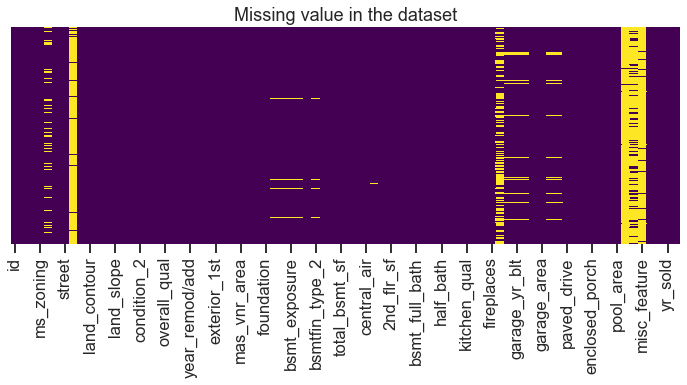

In [11]:
# Let's look at the null values in a heatmap to get an overview
plt.figure(figsize=(12,4))
sns.heatmap(df_test.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [12]:
## Identify the different data types of each column.
df_test.dtypes.head() == 'object'

id              False
pid             False
ms_subclass     False
ms_zoning        True
lot_frontage    False
dtype: bool

In [13]:
num_vars = df_test.columns[df_test.dtypes != 'object']
cat_vars = df_test.columns[df_test.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold'],
      dtype='object')
Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_con

In [14]:
df_test[num_vars].isnull().sum().sort_values(ascending=False)

lot_frontage       160
garage_yr_blt       45
mas_vnr_area         1
id                   0
wood_deck_sf         0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_cars          0
garage_area          0
open_porch_sf        0
full_bath            0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
half_bath            0
bsmt_half_bath       0
pid                  0
bsmtfin_sf_1         0
ms_subclass          0
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
bsmtfin_sf_2         0
bsmt_full_bath       0
bsmt_unf_sf          0
total_bsmt_sf        0
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
yr_sold              0
dtype: int64

Lot Frontage

In [15]:
#Let's us look at the numerical columns first. We will impute data into 'Lot Frontage' column.

from sklearn.impute import SimpleImputer

imp = SimpleImputer(add_indicator = True)
lot_frontage_impute = imp.fit_transform(df_test[['lot_frontage']])

print(lot_frontage_impute)

[[69.        0.      ]
 [69.545961  1.      ]
 [58.        0.      ]
 ...
 [55.        0.      ]
 [60.        0.      ]
 [70.        0.      ]]


In [16]:
pd.DataFrame(lot_frontage_impute)

,0,1
0,69.000000,0.0
1,69.545961,1.0
2,58.000000,0.0
3,60.000000,0.0
4,69.545961,1.0
...,...,...
873,80.000000,0.0
874,90.000000,0.0
875,55.000000,0.0
876,60.000000,0.0


In [17]:
df_test['lot_frontage'] = pd.DataFrame(lot_frontage_impute)[0]

In [18]:
#Checking if it has been imputed.
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [19]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(add_indicator = True)
garage_yr_blt_impute = imp.fit_transform(df_test[['garage_yr_blt']])

print(garage_yr_blt_impute)

[[1910.    0.]
 [1977.    0.]
 [2006.    0.]
 ...
 [1968.    0.]
 [1974.    0.]
 [1955.    0.]]


In [20]:
pd.DataFrame(garage_yr_blt_impute)

,0,1
0,1910.0,0.0
1,1977.0,0.0
2,2006.0,0.0
3,1935.0,0.0
4,1963.0,0.0
...,...,...
873,1974.0,0.0
874,1966.0,0.0
875,1968.0,0.0
876,1974.0,0.0


In [21]:
df_test['garage_yr_blt'] = pd.DataFrame(garage_yr_blt_impute)[0]

In [22]:
df_test['garage_yr_blt']

0      1910.0
1      1977.0
2      2006.0
3      1935.0
4      1963.0
        ...  
873    1974.0
874    1966.0
875    1968.0
876    1974.0
877    1955.0
Name: garage_yr_blt, Length: 878, dtype: float64

mas_vnr_area

In [23]:
imp = SimpleImputer(add_indicator = True)
mas_vnr_area_impute = imp.fit_transform(df_test[['mas_vnr_area']])

print(mas_vnr_area_impute)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [24]:
pd.DataFrame(mas_vnr_area_impute)

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,247.0,0.0
...,...,...
873,0.0,0.0
874,410.0,0.0
875,0.0,0.0
876,0.0,0.0


In [25]:
df_test['mas_vnr_area'] = pd.DataFrame(mas_vnr_area_impute)[0]

In [26]:
df_test[num_vars].isnull().sum().sort_values(ascending=False)

id                 0
garage_area        0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
wood_deck_sf       0
pid                0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
full_bath          0
bsmt_half_bath     0
bsmt_full_bath     0
gr_liv_area        0
ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
yr_sold            0
dtype: int64

#### We will set the null values of these columns to zero. 
 - bsmt_half_bath
 - bsmt_full_bath
 - bsmtfin_sf_1
 - garage_cars
 - garage_area
 - total_bsmt_sf 
 - bsmt_unf_sf 
 - bsmtfin_sf_2 

As these columns are either continuous or integer, having a zero value will represent as NA as well. 

In [27]:
num_vars_to_0 = ['bsmt_half_bath'], ['bsmt_full_bath'], ['bsmtfin_sf_1'], ['garage_cars'], ['garage_area'], ['total_bsmt_sf'], ['bsmt_unf_sf'], ['bsmtfin_sf_2']

In [28]:
for i in num_vars_to_0:
    df_test[i] = df_test[i].replace(np.nan, 0) 

In [29]:
df_test[num_vars].isnull().sum()

id                 0
pid                0
ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
dtype: int64

### Now let's look at the categorical columns

In [30]:
df_test[cat_vars].isnull().sum().sort_values(ascending=False)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
garage_cond        45
garage_qual        45
garage_finish      45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
electrical          1
mas_vnr_type        1
functional          0
kitchen_qual        0
central_air         0
heating_qc          0
heating             0
paved_drive         0
ms_zoning           0
street              0
condition_2         0
lot_shape           0
land_contour        0
utilities           0
lot_config          0
land_slope          0
neighborhood        0
condition_1         0
bldg_type           0
foundation          0
house_style         0
roof_style          0
roof_matl           0
exterior_1st        0
exterior_2nd        0
exter_qual          0
exter_cond          0
sale_type           0
dtype: int64

According to the data description, these columns which has Null values represent something. Therefore, I will impute 'NA into these null values. 

| Null Values in Column | Description |
| -------- | --------|
| pool_qc | No Pool |
| misc_feature | None |
| alley | No Alley Access |
| fence | No fence |
| fireplace_qu | No Fireplace |
| garage_finish | No Garage|
| garage_cond | No Garage |
| garage_qual | No Garage |
| garage_type | No Garage |
| bsmt_exposure| No Basement |
| bsmtfin_type_2| No Basement |
| bsmt_cond | No Basement |
| bsmtfin_type_1 | No Basement |
| bsmt_qual | No Basement |
| mas_vnr_type | None |

In [31]:
for i in df_test.loc[:,cat_vars]:
    df_test[i] = df_test[i].replace(np.nan, 'NA') 

In [32]:
df_test.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

### Now that there are no more null values in all columns. Let's move to see the data types of each column

In [33]:
df_test[num_vars].dtypes

id                   int64
pid                  int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_1         int64
bsmtfin_sf_2         int64
bsmt_unf_sf          int64
total_bsmt_sf        int64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath       int64
bsmt_half_bath       int64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_yr_blt      float64
garage_cars          int64
garage_area          int64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
mo_sold              int64
y

#### Main mission now is to change all dtypes to integer for modeling. Let's start with the object types

In [34]:
ordinal_to_int = df_test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]

In [35]:
##mapping the ordinal columns to change to integer.
ordinal_to_int = df_test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]


dictionary = {'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1  
}


for i in ordinal_to_int.columns:
    df_test.replace({i:dictionary},inplace=True)

In [36]:
#Let's check.
df_test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,...,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,4,4,3,3,2,2,3,1,1,1,...,0,2,1,0,1,1,1,2,0,0
1,3,4,3,3,3,4,3,1,1,1,...,1,3,1,0,3,3,3,2,0,0
2,3,4,3,4,3,4,4,3,6,1,...,1,4,1,4,2,3,3,2,0,0
3,4,4,3,4,3,3,3,1,1,1,...,1,3,1,0,1,2,3,0,0,0
4,3,4,3,3,3,4,3,1,4,1,...,1,3,1,4,2,3,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,4,4,3,3,3,3,3,1,5,2,...,1,3,1,3,1,3,3,2,0,0
874,4,4,3,4,4,3,3,1,4,1,...,1,4,1,4,2,3,3,2,0,3
875,4,4,3,3,3,3,3,1,4,2,...,1,3,1,3,1,3,3,2,0,0
876,4,4,3,3,3,3,3,1,5,1,...,1,3,1,0,1,3,3,2,0,2


In [37]:
column_to_object = df_test.dtypes == 'object'

In [38]:
column_to_object.value_counts()

False    59
True     21
dtype: int64

In [39]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,4,Lvl,...,0,0,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,NA,3,Lvl,...,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,NA,3,Lvl,...,0,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,NA,4,Lvl,...,0,0,0,0,0,NA,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,NA,3,Lvl,...,0,185,0,0,0,NA,0,7,2009,WD


## Feature Engineering

#### We will try to find if there are any linearity of the column with sale price. We will use sns.jointplot to see the relationship, and .groupby saleprice (mean) to see the if we can group any similar feature. 
Let's start with lot_frontage

This graph shows that there is a positive correlation between lot frontage and sale price therefore, we will include lot frontage as a feature on its own. 

Now, let's look at ms_zoning

In [40]:
df_test['ms_zoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

From the nominal data in ms_zoning below, we need to give a dummy variable for the values. Let's look at the mean to help us give the variable. 
   
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [41]:
# from the mean table above, we can group them into 2 groups based on the mean saleprice.
nominal_to_int = df_test[['ms_zoning']]
dictionary = {
   'A (agr)':0,
    'I (all)':0,
    'C (all)':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [42]:
df_test[['ms_zoning']]

,ms_zoning
0,1
1,1
2,1
3,1
4,1
...,...
873,1
874,1
875,1
876,1


In [43]:
#ms_zoning will not be in the feature. 

df_test.drop(columns = ['ms_zoning'], inplace=True)

In [44]:
nominal_to_int = df_test[['street']]
dictionary = {
   'Grvl':1,
    'Pave':2
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [45]:
df_test[['street']]

,street
0,2
1,2
2,2
3,2
4,2
...,...
873,2
874,2
875,2
876,2


In [46]:
#'street' column will not be in the feature due to poor linearity

df_test.drop(columns = ['street'], inplace = True)

In [47]:
nominal_to_int = df_test[['alley']]
dictionary = {
   'Grvl':1,
    'Pave':1,
    'NA':2
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [48]:
#'alley' column will not be in the feature

df_test.drop(columns = ['alley'], inplace =True)

In [49]:
nominal_to_int = df_test[['land_contour']]
dictionary = {
   'Lvl':1,
    'Bnk':2,
    'HLS':2,
    'Low':3
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [50]:
#'land_contour' column will not be in the feature

df_test.drop(columns = ['land_contour'], inplace =True)

In [51]:
nominal_to_int = df_test[['lot_config']]
dictionary = {
   'Inside':1,
    'Corner':2,
    'FR2':3,
    'FR3':3,
    'CulDSac':3
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [52]:
#'lot_config' column will not be in the feature

df_test.drop(columns = ['lot_config'], inplace =True)

In [53]:
nominal_to_int = df_test[['neighborhood']]
dictionary = {
   'MeadowV':1,
    'IDOTRR':1,
    'BrDale':1,
    'OldTown':1,
    'BrkSide':1,
    'Edwards':2,
    'SWISU':2,
    'Landmrk':2,
    'Sawyer':2,
    'NPkVill':2,
    'Blueste':2,
    'NAmes':2,
    'Mitchel':2,
    'SawyerW':3,
    'Greens':3,
    'Gilbert':3,
    'NWAmes':3, 
    'Blmngtn':3,
    'CollgCr':3,
    'Crawfor':3, 
    'ClearCr':3,
    'Somerst':3,
    'Timber':4,
    'Veenker':4,
    'GrnHill':4,
    'NoRidge':4,
    'NridgHt':4,
    'StoneBr':4,
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [54]:
# we will include 'neighborhood' in the feature.

In [55]:
nominal_to_int = df_test[['condition_1', 'condition_2']]
dictionary = {
   'Artery':0,
    'Feedr':0,
    'Norm':0,
    'RRNn':0,
    'RRAn':1,
    'PosN':1,
    'PosA':2,
    'RRNe':2,
    'RRAe':2,
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [56]:
df_test['condition_3'] = df_test['condition_1'] + df_test['condition_2']

In [57]:
df_test['condition_3']

0      0
1      0
2      0
3      0
4      0
      ..
873    1
874    0
875    0
876    0
877    0
Name: condition_3, Length: 878, dtype: int64

In [58]:
df_test.drop(columns=['condition_1','condition_2'],inplace = True)

In [59]:
#I will dummify this variable as the building type intuitively may be an important feature.

df_test = pd.get_dummies(data = df_test, columns = ['bldg_type'])

In [60]:
df_test['exterior_1st'].unique()

array(['AsbShng', 'Plywood', 'VinylSd', 'Wd Sdng', 'CemntBd', 'MetalSd',
       'HdBoard', 'BrkComm', 'Stucco', 'WdShing', 'BrkFace', 'PreCast',
       'AsphShn'], dtype=object)

In [61]:
df_test['exterior_2nd'].unique()

array(['AsbShng', 'Plywood', 'VinylSd', 'Wd Sdng', 'CmentBd', 'MetalSd',
       'BrkFace', 'Stucco', 'HdBoard', 'Wd Shng', 'ImStucc', 'Brk Cmn',
       'PreCast', 'CBlock', 'AsphShn', 'Other'], dtype=object)

In [62]:
nominal_to_int = df_test[['exterior_1st']]
dictionary = {
   'AsphShn':0,
    'CBlock':0,
    'AsbShng':0,
    'BrkComm':0,
    'Stucco':0,
    'PreCast':0,
    'Wd Sdng':1,
    'MetalSd':1,
    'WdShing':1,
    'HdBoard':1,
    'Plywood':1,
    'BrkFace':1,
    'VinylSd':2,
    'CemntBd':2,
    'Stone':2, 
    'ImStucc':2, 
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [63]:
nominal_to_int = df_test[['exterior_2nd']]
dictionary = {
   'CBlock':0,
    'AsbShng':0,
    'AsphShn':0,
    'Brk Cmn':0,
    'PreCast':0,
    'Other' : 0,
    'Stone':1,
    'Wd Sdng':1,
    'Stucco':1,
    'Wd Shng':1,
    'MetalSd':1,
    'HdBoard':1,
    'Plywood':1,
    'BrkFace':2,
    'VinylSd':2,
    'ImStucc':2, 
    'CmentBd':2, 
        }

for i in nominal_to_int.columns:
    df_test.replace({i: dictionary},inplace = True)

In [64]:
df_test['exterior_3rd'] = df_test['exterior_1st'] + df_test['exterior_2nd']

In [65]:
df_test.drop(columns=['exterior_1st','exterior_2nd'],inplace = True)

In [66]:
df_test['exterior_3rd'] 

0      0
1      2
2      4
3      2
4      2
      ..
873    2
874    4
875    2
876    2
877    2
Name: exterior_3rd, Length: 878, dtype: int64

In [67]:
df_test.shape

(878, 77)

It seems like basement and garage related columns can be merged together accordingly. 

In [68]:
df_test['bsmt_qual_cond_merged'] = df_test['bsmt_qual'] + df_test['bsmt_cond']

In [69]:
df_test = df_test.drop(columns = ['bsmt_qual', 'bsmt_cond'])

In [70]:
df_test.shape

(878, 76)

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     878 non-null    int64  
 1   pid                    878 non-null    int64  
 2   ms_subclass            878 non-null    int64  
 3   lot_frontage           878 non-null    float64
 4   lot_area               878 non-null    int64  
 5   lot_shape              878 non-null    int64  
 6   utilities              878 non-null    int64  
 7   land_slope             878 non-null    int64  
 8   neighborhood           878 non-null    int64  
 9   house_style            878 non-null    object 
 10  overall_qual           878 non-null    int64  
 11  overall_cond           878 non-null    int64  
 12  year_built             878 non-null    int64  
 13  year_remod/add         878 non-null    int64  
 14  roof_style             878 non-null    object 
 15  roof_m

#### Looking back at the Problem Statement, let's pick out the relevant features/ columns that will be able to answer the problem statement when we do our model. These are the features that i will include. Other features that are not in are excluded as i feel that it may not be relevant to answering the problem statement. 

In [72]:
# let's look at the columns again. 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     878 non-null    int64  
 1   pid                    878 non-null    int64  
 2   ms_subclass            878 non-null    int64  
 3   lot_frontage           878 non-null    float64
 4   lot_area               878 non-null    int64  
 5   lot_shape              878 non-null    int64  
 6   utilities              878 non-null    int64  
 7   land_slope             878 non-null    int64  
 8   neighborhood           878 non-null    int64  
 9   house_style            878 non-null    object 
 10  overall_qual           878 non-null    int64  
 11  overall_cond           878 non-null    int64  
 12  year_built             878 non-null    int64  
 13  year_remod/add         878 non-null    int64  
 14  roof_style             878 non-null    object 
 15  roof_m

In [73]:
df_test['bsmtfin_type_merged'] = df_test['bsmtfin_type_1'] + df_test['bsmtfin_type_2']

In [74]:
df_test = df_test.drop(columns = ['bsmtfin_type_1', 'bsmtfin_type_2'])

In [75]:
df_test['bsmtfin_sf_merged'] = df_test['bsmtfin_sf_1'] + df_test['bsmtfin_sf_2']

In [76]:
df_test = df_test.drop(columns = ['bsmtfin_sf_1', 'bsmtfin_sf_2'])

In [77]:
df_test.shape

(878, 74)

In [78]:
df_test['total_bsmt_sf']

0      1020
1      1967
2       654
3       968
4      1394
       ... 
873    1084
874    1104
875     952
876     864
877     923
Name: total_bsmt_sf, Length: 878, dtype: int64

In [79]:
df_test['garage_qual_cond_merged'] = df_test['garage_qual'] + df_test['garage_cond']

In [80]:
df_test['garage_qual_cond_merged']

0      2
1      6
2      6
3      5
4      6
      ..
873    6
874    6
875    6
876    6
877    6
Name: garage_qual_cond_merged, Length: 878, dtype: int64

In [81]:
df_test = df_test.drop(columns = ['garage_qual', 'garage_cond'])

In [82]:
df_test.shape

(878, 73)

In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       878 non-null    int64  
 1   pid                      878 non-null    int64  
 2   ms_subclass              878 non-null    int64  
 3   lot_frontage             878 non-null    float64
 4   lot_area                 878 non-null    int64  
 5   lot_shape                878 non-null    int64  
 6   utilities                878 non-null    int64  
 7   land_slope               878 non-null    int64  
 8   neighborhood             878 non-null    int64  
 9   house_style              878 non-null    object 
 10  overall_qual             878 non-null    int64  
 11  overall_cond             878 non-null    int64  
 12  year_built               878 non-null    int64  
 13  year_remod/add           878 non-null    int64  
 14  roof_style               8

In [84]:
# columns that i drop are the columns that will not be in my feature. 
feature1 = df_test.drop(columns =  ['pid', 'land_slope', 'house_style', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_type',
                                    'foundation', 'bsmt_unf_sf', 'heating', 'central_air', 'low_qual_fin_sf', 'garage_type', 
                                    'garage_yr_blt', 'garage_finish', 'paved_drive', 'wood_deck_sf','open_porch_sf',
                                    'enclosed_porch', '3ssn_porch', 'screen_porch','fence', 'misc_feature', 'misc_val',
                                    'mo_sold','sale_type'])

#feature1 = df_train[['ms_subclass', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'neighborhood', 'house_style',
                    'overall_quad', 'overall_cond','year_built', 'year_remod/add','mas_vnr_type', 'mas_vnr_area',
                    'exter_qual', 'exter_cond', ' bsmt_exposure', 'total_bsmt_sf', 'heating', 'heating_qc', 'electrical',
                    '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', #'half_bath',
                    'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces',
                    'fireplace_qu', 'garage_cars', 'garage_area', '', 
                    ]]

In [85]:
feature1.isnull().sum()

id                         0
ms_subclass                0
lot_frontage               0
lot_area                   0
lot_shape                  0
utilities                  0
neighborhood               0
overall_qual               0
overall_cond               0
year_remod/add             0
mas_vnr_area               0
exter_qual                 0
exter_cond                 0
bsmt_exposure              0
total_bsmt_sf              0
heating_qc                 0
electrical                 0
1st_flr_sf                 0
2nd_flr_sf                 0
gr_liv_area                0
bsmt_full_bath             0
bsmt_half_bath             0
full_bath                  0
half_bath                  0
bedroom_abvgr              0
kitchen_abvgr              0
kitchen_qual               0
totrms_abvgrd              0
functional                 0
fireplaces                 0
fireplace_qu               0
garage_cars                0
garage_area                0
pool_area                  0
pool_qc       

In [86]:
feature1.describe()

,id,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,neighborhood,overall_qual,overall_cond,year_remod/add,...,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd,bsmt_qual_cond_merged,bsmtfin_type_merged,bsmtfin_sf_merged,garage_qual_cond_merged
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,58.268793,69.545961,10307.033030,3.602506,3.998861,2.451025,6.050114,5.566059,1984.417995,...,0.824601,0.018223,0.038724,0.036446,0.082005,2.719818,6.358770,4.785877,495.224374,5.605923
std,850.838263,42.235407,21.279162,10002.674602,0.579264,0.033748,0.925623,1.369065,1.128903,20.450725,...,0.380524,0.133834,0.193047,0.187505,0.274528,1.044656,1.347318,2.380974,463.012119,1.378136
min,2.000000,20.000000,21.000000,1477.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,692.250000,20.000000,60.000000,7297.250000,3.000000,4.000000,2.000000,5.000000,5.000000,1967.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,2.000000,0.000000,6.000000
50%,1433.000000,50.000000,69.545961,9446.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1992.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,5.000000,474.000000,6.000000
75%,2197.500000,70.000000,78.000000,11589.000000,4.000000,4.000000,3.000000,7.000000,6.000000,2003.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,7.000000,822.000000,6.000000
max,2928.000000,190.000000,182.000000,215245.000000,4.000000,4.000000,4.000000,10.000000,9.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,11.000000,2288.000000,9.000000


In [87]:
feature1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       878 non-null    int64  
 1   ms_subclass              878 non-null    int64  
 2   lot_frontage             878 non-null    float64
 3   lot_area                 878 non-null    int64  
 4   lot_shape                878 non-null    int64  
 5   utilities                878 non-null    int64  
 6   neighborhood             878 non-null    int64  
 7   overall_qual             878 non-null    int64  
 8   overall_cond             878 non-null    int64  
 9   year_remod/add           878 non-null    int64  
 10  mas_vnr_area             878 non-null    float64
 11  exter_qual               878 non-null    int64  
 12  exter_cond               878 non-null    int64  
 13  bsmt_exposure            878 non-null    int64  
 14  total_bsmt_sf            8

### Now that we have cleaned the data, let's save this cleaned data into a new folder.

In [88]:
feature1.to_csv('./datasets/df_test_cleaned.csv', index = False)